In [3]:
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

In [4]:
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.altomfotball.no/element.do?cmd=tournamentTable&tournamentId=230&seasonId=342&useFullUrl=false')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table border="0" cellpadding="0" cellspacing="0" class="sd_table sd_sortable sd_sortabletable" id="sd_table_230" summary="Tabell">
<thead>
<tr>
<th class="sd_table_rank"><span> </span></th>
<th class="sd_table_team"><span>Lag</span></th>
<th title="Kamper"><span>K</span></th>
<th title="Vunnet"><span>V</span></th>
<th title="Uavgjorte"><span>U</span></th>
<th title="Tapte"><span>T</span></th>
<th title="Mål for"><span>+</span></th>
<th title="Mål mot"><span>-</span></th>
<th title="Målforskjell"><span>+/-</span></th>
<th class="sd_table_points" title="Poeng"><span>P</span></th>
<th class="sd_left">Siste Kamper</th>
</tr>
</thead>
<tbody>
<tr class="sd_table_up sd_odd">
<td class="sd_table_new">1.</td>
<td class="sd_table_team">
<a href="element.do?cmd=team&amp;teamId=722&amp;tournamentId=230&amp;seasonId=342&amp;useFullUrl=false">Man. City</a></td>
<td>38</td>
<td>27</td>
<td>5</td>
<td>6</td>
<td>83</td>
<td>32</td>
<td>+51</td>
<td class="sd_table_points">86</td>
<td class="sd_left"

In [5]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['', 'Lag', 'K', 'V', 'U', 'T', '+', '-', '+/-', 'P', 'Siste Kamper'], ['1.', 'Man.City', '38', '27', '5', '6', '83', '32', '+51', '86', ''], ['2.', 'Man.United', '38', '21', '11', '6', '73', '44', '+29', '74', ''], ['3.', 'Liverpool', '38', '20', '9', '9', '68', '42', '+26', '69', ''], ['4.', 'Chelsea', '38', '19', '10', '9', '58', '36', '+22', '67', ''], ['5.', 'Leicester', '38', '20', '6', '12', '68', '50', '+18', '66', ''], ['6.', 'WestHam', '38', '19', '8', '11', '62', '47', '+15', '65', ''], ['7.', 'Tottenham', '38', '18', '8', '12', '68', '45', '+23', '62', ''], ['8.', 'Arsenal', '38', '18', '7', '13', '55', '39', '+16', '61', ''], ['9.', 'Leeds', '38', '18', '5', '15', '62', '54', '+8', '59', ''], ['10.', 'Everton', '38', '17', '8', '13', '47', '48', '-1', '59', ''], ['11.', 'AstonVilla', '38', '16', '7', '15', '55', '46', '+9', '55', ''], ['12.', 'Newcastle', '38', '12', '9', '17', '46', '62', '-16', '45', ''], ['13.', 'Wolverhampton', '38', '12', '9', '17', '36', '52', '-16'

In [6]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('premier_league.csv',table)

In [7]:
g = pd.read_csv('premier_league.csv', delimiter=';', encoding='latin1')

In [8]:
g

,Unnamed: 0,Lag,K,V,U,T,+,-,+/-,P,Siste Kamper
0,1.0,Man.City,38,27,5,6,83,32,51,86,NaN
1,2.0,Man.United,38,21,11,6,73,44,29,74,NaN
2,3.0,Liverpool,38,20,9,9,68,42,26,69,NaN
3,4.0,Chelsea,38,19,10,9,58,36,22,67,NaN
4,5.0,Leicester,38,20,6,12,68,50,18,66,NaN
5,6.0,WestHam,38,19,8,11,62,47,15,65,NaN
6,7.0,Tottenham,38,18,8,12,68,45,23,62,NaN
7,8.0,Arsenal,38,18,7,13,55,39,16,61,NaN
8,9.0,Leeds,38,18,5,15,62,54,8,59,NaN
9,10.0,Everton,38,17,8,13,47,48,-1,59,NaN


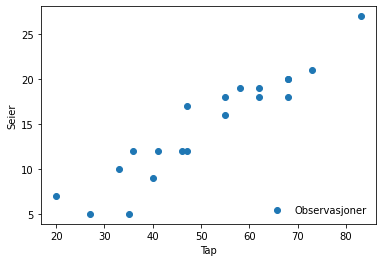

In [9]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Seier')
ax.set_xlabel('Tap')

#plotting the function:
ax.scatter(g['+'], g['V'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

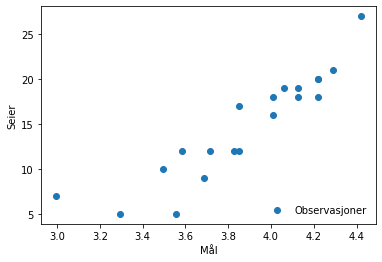

In [10]:
fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Seier')
ax.set_xlabel('Mål')



#plotting the function:
ax.scatter(np.log(g['+']), g['V'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [11]:
y=g['V']
pd.DataFrame(y)

,V
0,27
1,21
2,20
3,19
4,20
5,19
6,18
7,18
8,18
9,17


In [12]:
x=pd.DataFrame(np.log(g['+']))
x['intercept']=1
x

,+,intercept
0,4.418841,1
1,4.290459,1
2,4.219508,1
3,4.060443,1
4,4.219508,1
5,4.127134,1
6,4.219508,1
7,4.007333,1
8,4.127134,1
9,3.850148,1


In [13]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     89.79
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           2.03e-08
Time:                        18:48:58   Log-Likelihood:                -45.363
No. Observations:                  20   AIC:                             94.73
Df Residuals:                      18   BIC:                             96.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
+             14.6982      1.551      9.476      0.0

In [14]:
res.params

+            14.698164
intercept   -42.146198
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


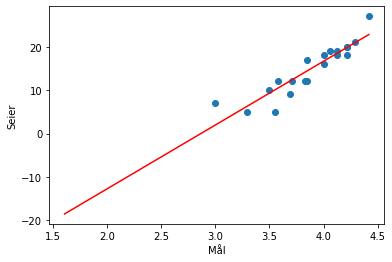

In [15]:
fig,ax=plt.subplots()

x=np.linspace(min(np.log(g['V'])), max(np.log(g['+'])), 40)


regression_line=res.params['intercept']+res.params['+']*x

ax.plot(x, regression_line,color='red')


#adding axis lables:
ax.set_ylabel('Seier')
ax.set_xlabel('Mål')


#plotting the function:
ax.scatter(np.log(g['+']), g['V'],  label='')
ax.legend(loc='lower right',frameon=False)

I oppgaven har jeg hentet tabbellen fra 2020/21 sesong fra Premier League i England, dette for å gjøre en regresjonsanalyse for å se om det er en korreleasjon mellom antall scorte mål og vunnet kamper. Det vi da ser er at det ikke alltid er en korrelasjon mellom antall scorte mål og hvor mange kamper man vinner. Man ser at det skjer i de fleste tilfellene, men ikke i alle, noen lag scorer mål. Dette medfører ikke at de alltid vinner flere kamper. 